<a href="https://colab.research.google.com/github/RJuro/aqm2021/blob/main/Lecture1_after.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descriptive Statistics and the Law of Large Numbers

## Statistics

Every day we are confronted with situations with uncertain outcomes, and must make decisions based on incomplete data: "Which stock
should I buy? Should I take this medication? Should
I have my children vaccinated?” 

Statistics can turn a vague statement like “This medication may
cause nausea” into a specific statement like “Three patients in one thousand experience nausea when taking this medication”. 

In short, statistical methods can help you make the "best educated guess."



## Example: The Simpsons Ratings

Today, we are going to discuss some fundamental statistical concepts with an example with real data.

As usual, we start by loading the Python packages that we are going to use in the analysis.



In [ ]:
import numpy as np #Package for numerical multidimensional tables
import pandas as pd #Package for data frames
import matplotlib.pyplot as plt #Package for plots and graphs

Over the years, I have had a discussion with friends and colleagues about if The Simpsons is a good show. Interestingly, the discussion sometimes devolves into, it was a good show but *went bad* eventually.

To give the discussion some objective dimension, we decided to look at the ratings from episodes along the years (There are 31 seasons and counting!). The data comes from "ratingraph.com" and it is saved in the ‘Simpsons_Ratings.csv’ file.

We upload the file to Google Collab with the following code.


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Simpsons_ratings.csv to Simpsons_ratings.csv


We then load the data using a pandas data frame. And we print it.

In [ ]:
data = pd.read_csv('Simpsons_ratings.csv')
print(data)

     Season  Episode                                Title  Year  Votes  Rating
0         1        1    Simpsons Roasting on an Open Fire  1989   6681     8.2
1         1        2                      Bart the Genius  1990   4358     7.7
2         1        3                      Homer's Odyssey  1990   3828     7.4
3         1        4        There's No Disgrace Like Home  1990   3785     7.7
4         1        5                     Bart the General  1990   4054     8.0
..      ...      ...                                  ...   ...    ...     ...
700      32       18                         Burger Kings  2021    323     6.9
701      32       19  Panic on the Streets of Springfield  2021    425     6.2
702      32       20             Mother and Child Reunion  2021    291     7.2
703      32       21            The Man from G.R.A.M.P.A.  2021    253     6.5
704      32       22                  The Last Barfighter  2021    301     7.7

[705 rows x 6 columns]


The dataset includes season, number of episode, title, year, votes (number of people rating the episode), and rating. 

The data is presented in ascending order through the years.

The file contains ratings for all Simpsons episodes to date. If the Simpsons were to be cancelled tomorrow, the data would consists of the **population**. 

Nonetheless, as more episodes are already in production, even this large amount of data is a **sample** from the Simpsons ratings.

We can get a sense of the trajectory of the show by looking at the rating through time. That is, we create a **time series**.

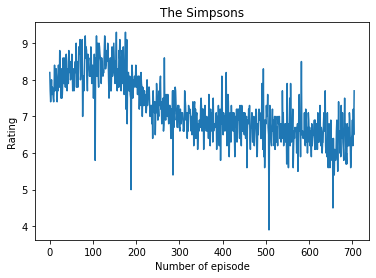

In [ ]:
numeps = list(range(705))
plt.plot(numeps,data['Rating'])
plt.xlabel('Number of episode')
plt.ylabel('Rating')
plt.title("The Simpsons")
plt.show()

Depending on whom you ask, they will say that there is a **significant** decline in ratings aroung the 200 episode.

As we will discuss during the course, the concept of significance implies that a **statistical test** has been performed. Tests allow us to determine if the seemingly lower ratings for later years are due to **random variation** or actual differences.

For now, let us analyze the data a little further by looking at the rating by seasons.

The data is **quantitative** in the sense that we are presented with numbers. Nevertheless, one could argue that the difference between a rating of 8.1 or 8.2 is minimal and makes more sense to talk about good, bad, or regular episodes instead. That is, having **qualitative data**.

We can construct qualitative data by making categories depending on the rating. We define the following categories:

* *Must watch* if $rating>9$
* *Good* if $rating\in(7.5,9)$
* *Average* if $rating\in(6,7.5)$
* *Bad* if $rating\in(3,6)$

In [ ]:
Labels = ['Must Watch','Good','So So','Bad']
data['Label'] = ''
data.loc[data['Rating']>=9,'Label'] = Labels[0]
data.loc[(data['Rating']<9) & (data['Rating']>=7.5),'Label'] = Labels[1]
data.loc[(data['Rating']<7.5) & (data['Rating']>6),'Label'] = Labels[2]
data.loc[data['Rating']<6,'Label'] = Labels[3]
print(data)

     Season  Episode                                Title  ...  Votes  Rating  Label
0         1        1    Simpsons Roasting on an Open Fire  ...   6681     8.2   Good
1         1        2                      Bart the Genius  ...   4358     7.7   Good
2         1        3                      Homer's Odyssey  ...   3828     7.4  So So
3         1        4        There's No Disgrace Like Home  ...   3785     7.7   Good
4         1        5                     Bart the General  ...   4054     8.0   Good
..      ...      ...                                  ...  ...    ...     ...    ...
700      32       18                         Burger Kings  ...    323     6.9  So So
701      32       19  Panic on the Streets of Springfield  ...    425     6.2  So So
702      32       20             Mother and Child Reunion  ...    291     7.2  So So
703      32       21            The Man from G.R.A.M.P.A.  ...    253     6.5  So So
704      32       22                  The Last Barfighter  ...   

Once we have defined the categories, we can then present visually the proportion of good versus bad shows using a graph. Below we use a **pie chart**.

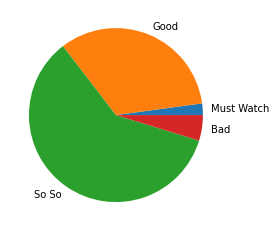

In [ ]:
s1=[0,0,0,0]
s1[0] = data[data['Label']==Labels[0]].shape[0]
s1[1] = data[data['Label']==Labels[1]].shape[0]
s1[2] = data[data['Label']==Labels[2]].shape[0]
s1[3] = data[data['Label']==Labels[3]].shape[0]

plt.pie(s1,labels=Labels)
plt.show()

The pie chart tells us that the majority of episodes are 'So So', followed by the number of 'Good' ones. Interestingly, there are more 'Bad' episodes than 'Must Watch'.

A final way (for the purpose of this lecture) to present the different ratings is to construct an histogram.

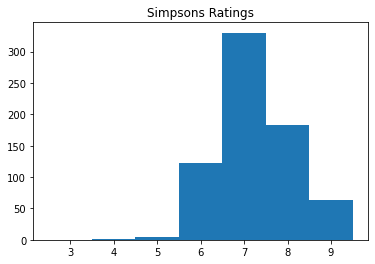

In [ ]:
plt.hist(data['Rating'],bins=[2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
plt.title('Simpsons Ratings')
plt.show()

The histogram is concentrated more towards the high ratings. Which gives more evidence that there seems to be more good episodes than bad. 

The limitation of looking at ratings for all episodes is that it can be hard to make decisions. For example, looking at hisograms, it can be hard to argue if a show is better than other, as the example using Family Guy below shows.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving FamilyGuy_ratings.csv to FamilyGuy_ratings.csv


     Season  Episode                        Title   Year  Votes  Rating
0         1        1            Death Has a Shadow  1999  3,058     7.8
1         1        2      I Never Met the Dead Man  1999  2,288     7.6
2         1        3      Chitty Chitty Death Bang  1999  2,180     7.7
3         1        4              Mind Over Murder  1999  2,066     7.5
4         1        5         A Hero Sits Next Door  1999  2,012     7.5
..      ...      ...                           ...   ...    ...     ...
364      19       16              Who's Brian Now?  2021    357     6.9
365      19       17             Young Parent Trap  2021    372     7.3
366      19       18           Meg Goes to College  2021    329     6.9
367      19       19                    Family Cat  2021    358     7.3
368      19       20  Tales of Former Sports Glory  2021    375     6.3

[369 rows x 6 columns]


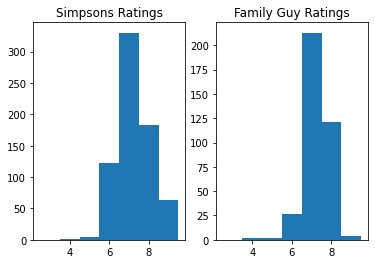

In [ ]:
fm = pd.read_csv('FamilyGuy_ratings.csv')
print(fm)

plt.subplot(1, 2, 1)
plt.hist(data['Rating'],bins=[2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
plt.title('Simpsons Ratings')

plt.subplot(1, 2, 2)
plt.hist(fm['Rating'],bins=[2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
plt.title('Family Guy Ratings')
plt.show()

Family Guy seems to have less episodes rated 6 or lower, but also less episodes rated 9 or above.

Hence, we compute some measurements of the data that allow us to make better decisions. That is, computing a *representative* number for The Simpsons and compare it against the analogous *representative* number for Family Guy.

The most common tests between samples is to compare their *central tendencies*. That is, how an episode in *the middle* compares between shows.

The measures for central tendency are:
* **Mode**: The most frequent number—that is, the number that occurs the highest number of times.
* **Median**: The middle number; found by ordering all data points and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers).
* **Mean**: The *average* number; found by adding all data points and dividing by the number of data points. 

We can compute these measures in our example.

In [ ]:
show_medians = [np.median(data['Rating']),np.median(fm['Rating'])]
display(show_medians)

show_means = [np.mean(data['Rating']),np.mean(fm['Rating'])]
display(show_means)

[7.1, 7.2]

[7.197446808510636, 7.171815718157177]

In terms of the medians, Family Guy seems to have a slight advantage; whilst The Simpsons seems to score better on the means.

Nonetheless, these two measures seems to be quite close together. For example, notice that the difference between the means is in the hundreths. 

Furthermore, recall that there are many sources of **uncertainty** regarding these quantities; thus, we need more formal statistical tools to be able to properly determine the better show (more on this during the following lectures). 

For now, we know that the variance (standard deviation) is a measure of the uncertainty.

In [ ]:
show_variance = [np.var(data['Rating']),np.var(fm['Rating'])]
display(show_variance)

[0.708702701071376, 0.40137366793722096]

## Law of Large Numbers

One of the main contributors to uncertainty is the sample size. The Simpsons ratings data we have considered could be argued to be large in the sense that it would be quite costly to create it from scratch. We have to ask thousands of persons to rate hundreds of episodes. 

The same logic applies for most analysis. In principle we would like to obtain data for the whole population, but it is almost always unfeasible. Thus, we have to rely on samples of smaller size. 

One way to get around the restrictions on sample size is to generate our own data. This allows us to study the effect that the sample size has on our statistical tests. 

The method of simulating data for analysisis is called **Monte Carlo**. 

The Monte Carlo method was invented by John von Neumann and Stanislaw Ulam during World War II to improve decision making under uncertain conditions. It was named after a well-known casino town, Monaco, since the element of chance is core to the modeling approach, similar to a game of roulette.

The idea behind Monte Carlo method is to select a sampling distribution, commonly using a known probability distribution, to generate data of different sizes. We then can compute our tests on the different samples and analyze the differences.



In [ ]:
sum(data['Votes'])

1126018

## Monte Carlo Simulation: Coin game

Let's start with a simple example. In the classical statistics culture, we typically assume that a given phenomena follows a particular probability distribution.

The assumption allows us to derive the properties that our estimates follow. We can then use these properties to make tests and take decisions.

We set a coin-flipping game. To code our coin-flipping game, we start by generating random numbers. The function random from the random library generates a number between 0 and 1.

In [ ]:
import random as rnd

In [ ]:
rnd.random()

0.5254892936305813

To generate a *fair* coin, the coin falls on heads (coded as 1) if the random number is greater than 0.5, and tails (coded as 0) otherwise.

We include a parameter $p$ to control the fairness of the coin.

In [ ]:
def coin_flip(p):
    return(1*(rnd.random()>=p))

In [ ]:
coin_flip(0.5)

1

We are ready for the game. We set a **seed** for the random number generator so that our results are reproducible. And we flip the coin $n$ times. 

In [ ]:
def game(n,p=0.5):
    draw = []
    for i in range(0,n):
            draw.append(coin_flip(p))
    return(draw)

In [ ]:
rnd.seed(210)

g10 = game(10)
g10

[0, 1, 1, 0, 0, 0, 0, 0, 0, 1]

Counting the number of heads and computing the mean.

In [ ]:
heads = sum(g10)
display(heads)

coin_mean = np.mean(g10)
display(coin_mean)

3

0.3

Time for some math.

From probability, we know that the theoretical mean $\mu$ of the coin flip is given by

$$\mu = Pr(Coin=1)*1+Pr(Coin=0)*0$$

For a *fair coin*, $Pr(Coin=1)=0.5$; thus, $\mu=0.5$.

In our example above, our estimate, the sample mean, $\bar{X}=(X_1+X_2+\cdots+X_{10})/10=0.3$ seems too far off from the theoretical value.


One could argue that 10 flips of the coin are too few.
Why not playing the game a hundred times?

In [ ]:
gg = game(100)

heads = sum(gg)
display(heads)

coin_mean = np.mean(gg)
display(coin_mean)

58

0.58

We see that by flipping the coin 100 times, we obtain a value for the sample mean that is closer to the theoretical one.

That would suggest that we need more flips to get a better estimate.

This perception can indeed be proven theoretically. It is stated in the law of large numbers.

> **Law of Large Numbers**: Let $X_1,X_2,\cdots$ be a sequence of i.i.d. random variables with mean $\mu$, and let $\bar{X}=\frac{1}{n}(X_1+X_2+\cdots+X_n)$ be the sample mean. Then, for every $\epsilon>0$
$$P(|\bar{X}-\mu|>\epsilon)\to 0, \text{  as   } n\to\infty.$$

The probability that the distance between them is larger than a given positive $epsilon$ value goes to zero.

In words, the law of large numbers says that if you take samples of larger and larger size from any population, then the mean of the sampling distribution, $\bar{x}$ tends to get closer and closer to the true population mean, $\mu$. 

We can see this in action using Monte Carlo Simulation.

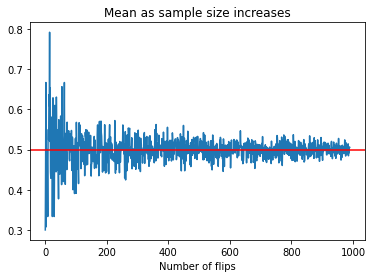

In [ ]:
means = []
N = 1000
for i in range(10,N):
  means.append(np.mean(game(i)))

plt.plot(means)
plt.axhline(y=0.5,color='red')
plt.title('Mean as sample size increases')
plt.xlabel('Number of flips')
plt.show()

Notice how our estimate gets closer and closer to the theoretical value as we increse the number of flips. 

Nonetheless, note that the law of large numbers only tells us that we are getting closer; it does not tells us anything about the speed or the uncertainty of the estimate.

For the latter, we need another theorem, the Central Limit Theorem.